Prepare a model for glass classification using KNN

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

 2 --building_windows_non_float_processed

 3 --vehicle_windows_float_processed

 4 --vehicle_windows_non_float_processed (none in this database)

 5 --containers

 6 --tableware

 7 --headlamps

In [ ]:
# KNN Classification
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
glass=read_csv("/content/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.shape

(214, 10)

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


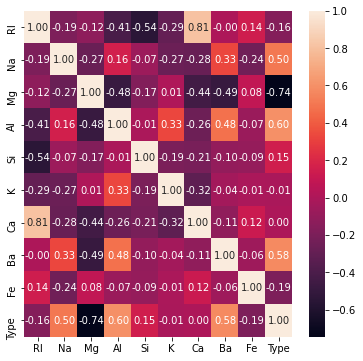

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(glass.corr(),annot=True,fmt='.2f')

Ca and K are least correlated with Type.
Also Ca is highly correlated with RI.
Drop Ca and K

In [ ]:
#Drop columns (Ca,K)
glass=glass.drop(columns=['Ca','K'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


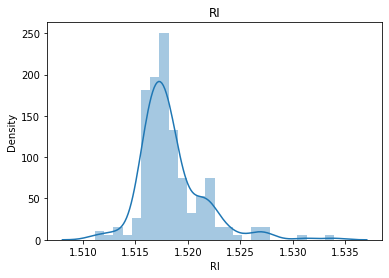

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


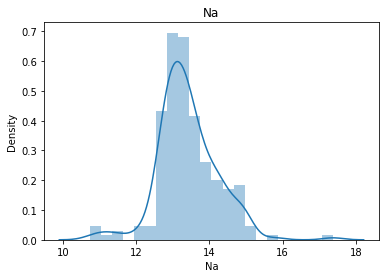

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


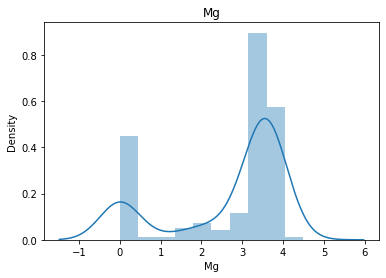

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


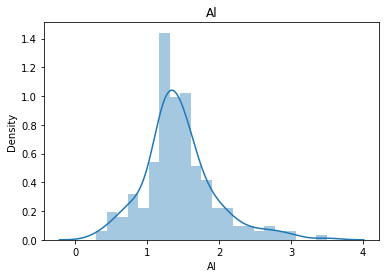

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


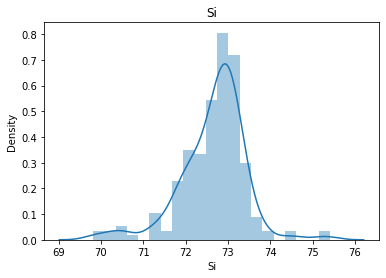

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


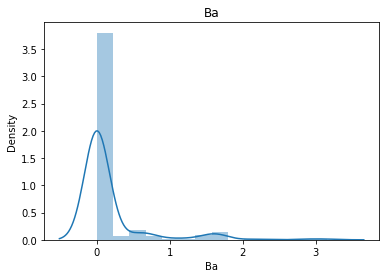

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


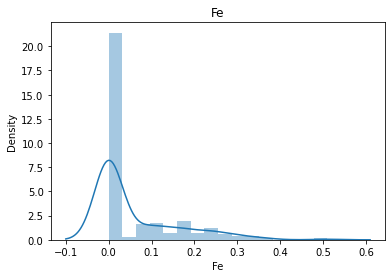

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


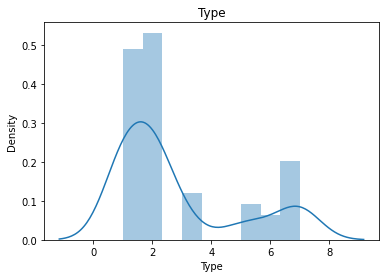

In [ ]:
for col in glass.columns:
  sns.distplot(glass[col])
  plt.title(col)
  plt.show()

There is very high positive skewness in RI, Na, Al, Ba, Fe and Type
There is negative skewness in Mg and Si

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


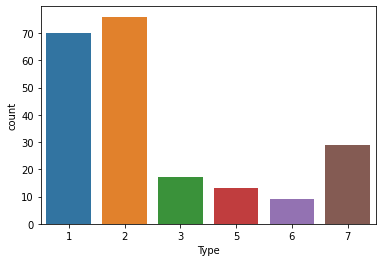

In [ ]:
sns.countplot(glass.Type)

Most frequent type of glasses are Type 1 and Type 2 in our data with the maximum value of 70 and 76.The data is imbalanced.

In [ ]:
#Extract the features
X=glass.iloc[:,:-1].values
y=glass.iloc[:,-1].values
print(X.shape,y.shape)

(214, 7) (214,)


In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(171, 7) (43, 7) (171,) (43,)


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


##Grid Search for Algorithm tuning

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 1}


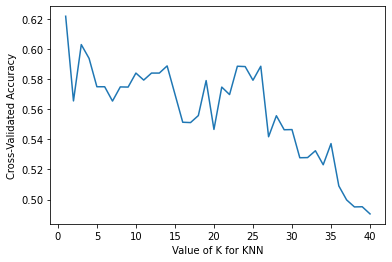

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

We can see that the max accuracy can be obtained if we consider only one neighbor for our classification.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
knn = KNeighborsClassifier(n_neighbors =1)
model=knn.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6976744186046512


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
train_pred=model.predict(X_train)
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
train_acc=round(accuracy_score(y_train, train_pred)*100.0,3)
print('Accuracy of train dataset:{}%'.format(train_acc))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
test_acc=round(accuracy_score(y_test, y_pred)*100.0,3)
print('Accuracy of test dataset:{}%'.format(test_acc))

[[51  0  0  0  0  0]
 [ 0 64  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
Accuracy of train dataset:100.0%
[[13  3  3  0  0  0]
 [ 1  9  0  1  1  0]
 [ 1  3  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Accuracy of test dataset:69.767%


Using too low a k value 1 (though it is optimum) is resulting in the overfitting of our model. It may also be due to the noise in the data. 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.68      0.76        19
           2       0.60      0.75      0.67        12
           3       0.40      0.33      0.36         6
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         4

    accuracy                           0.70        43
   macro avg       0.64      0.79      0.69        43
weighted avg       0.72      0.70      0.70        43



Building the knn model with 2 neighbors beacuase as we increase K, our decision surface gets smoother.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
knn_2 = KNeighborsClassifier(n_neighbors =2)
model_2=knn_2.fit(X_train,y_train)
y_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6976744186046512


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
train_pred=model.predict(X_train)
cm_train= confusion_matrix(y_train, train_pred)
print(cm_train)
train_acc=round(accuracy_score(y_train, train_pred)*100.0,3)
print('Accuracy of train dataset:{}%'.format(train_acc))

cm_test= confusion_matrix(y_test, y_pred)
print(cm_test)
test_acc=round(accuracy_score(y_test, y_pred)*100.0,3)
print('Accuracy of test dataset:{}%'.format(test_acc))

[[51  0  0  0  0  0]
 [12 52  0  0  0  0]
 [ 4  4  3  0  0  0]
 [ 1  2  0  9  0  0]
 [ 1  2  0  0  5  0]
 [ 1  2  0  1  1 20]]
Accuracy of train dataset:81.871%
[[16  2  1  0  0  0]
 [ 2  8  0  2  0  0]
 [ 2  4  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Accuracy of test dataset:69.767%


I chose 2 as my neighbors to avoid overfitting and the test accuracy is same.

##Predicting a new result

In [ ]:
ri=float(input('Enter the refractive index of the glass: '))
s=float(input('Enter the weigght percent in oxide for Na: '))
m=float(input('Enter the weigght percent in oxide for Mg: '))
a=float(input('Enter the weigght percent in oxide for Al: '))
si=float(input('Enter the weigght percent in oxide for Si: '))
b=float(input('Enter the weigght percent in oxide for Ba: '))
i=float(input('Enter the weigght percent in oxide for Fe: '))

Enter the refractive index of the glass: 1.52
Enter the weigght percent in oxide for Na: 12.72
Enter the weigght percent in oxide for Mg: 3.65
Enter the weigght percent in oxide for Al: 1.46
Enter the weigght percent in oxide for Si: 72.5
Enter the weigght percent in oxide for Ba: 0.32
Enter the weigght percent in oxide for Fe: 0.16


In [ ]:
print(model_2.predict(sc.transform([[ri,s,m,a,si,b,i]])))

[1]


The Type of glass belongs to first category. In other words, the given glass is building_windows_float_processed type.